In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.stats import multivariate_normal
import random
import pickle
from numpy import linalg as LA
import pylab as pl

In [2]:
np.random.seed()

N = 1000;
samples = []
labels = []
priors = [0.4, 0.6]

#Class 1
size_1 = 0
w11 = 0.3
mean_11 = np.array([-4, 2])
cov_11 = np.array([[2, 0], [0, 3]])
w12 = 0.7
mean_12 = np.array([-1, 1])
cov_12 = np.array([[3, 0.2], [0.2, 5]])

#Class 2
size_2 = 0
w21 = 0.2
mean_21 = np.array([1, 4])
cov_21 = np.array([[1.7, 0.3], [0.3, 5]])
w22 = 0.8
mean_22 = np.array([2, 6])
cov_22 = np.array([[1, 0.8], [0.8, 1]])


In [3]:
#Generate Samples
for i in range(N):
    u = random.random()
    if u <= priors[0]:
        labels.append(0)
        size_1 += 1
    else:
        labels.append(1)
        size_2 += 1


x1_1 = np.random.multivariate_normal(mean_11, cov_11, size_1) 
x1_2 = np.random.multivariate_normal(mean_12, cov_12, size_1)       
x2_1 = np.random.multivariate_normal(mean_21, cov_21, size_2)
x2_2 = np.random.multivariate_normal(mean_22, cov_22, size_2) 

iter1 = iter(x1_1)
iter2 = iter(x1_2)
iter3 = iter(x2_1)
iter4 = iter(x2_2)
for k in range(len(labels)):
    if labels[k] == 0:
        v = random.random()
        if v <= w11:
            #n_value = next(iter1)
            n_value = random.choice(x1_1)
            samples.append( np.append( n_value, labels[k]) )
        else:
            n_value = random.choice(x1_2)
            samples.append( np.append( n_value, labels[k]) )
    else:
        v = random.random()
        if v <= w21:
            #n_value = next(iter1)
            n_value = random.choice(x2_1)
            samples.append( np.append( n_value, labels[k]) )
        else:
            n_value = random.choice(x2_2)
            samples.append( np.append( n_value, labels[k]) )
        
samples = np.array(samples).T
np.shape(samples)

(3, 1000)

In [4]:
"""
    Minimum Expected Risk Classification
"""

pdf1 = w11 * multivariate_normal.pdf(samples[:2].T, mean=mean_11, cov=cov_11) + \
        w12 * multivariate_normal.pdf(samples[:2].T, mean=mean_12, cov=cov_12)
pdf2 = w21 * multivariate_normal.pdf(samples[:2].T, mean=mean_21, cov=cov_21) + \
        w22 * multivariate_normal.pdf(samples[:2].T, mean=mean_22, cov=cov_22)

x = samples[:2]
decisions = []
class1, class2 = 0, 0


for i in range(N):
    if (pdf1[i] > pdf2[i]):
        decisions.append(0) #Choose class 1
        class1 += 1
    else:
        decisions.append(1)
        class2 += 1

decisions = np.array(decisions)

In [5]:
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
#XY = np.meshgrid(X, Y)

x, y = np.mgrid[-10:10:.1, -10:10:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
g1_x = w11 * multivariate_normal.pdf(pos, mean=mean_11, cov=cov_11) + \
        w12 * multivariate_normal.pdf(pos, mean=mean_12, cov=cov_12)
g2_x = w21 * multivariate_normal.pdf(pos, mean=mean_21, cov=cov_21) + \
        w22 * multivariate_normal.pdf(pos, mean=mean_22, cov=cov_22)

db_x, db_y = [], []

for j, d1 in enumerate(X):
    for k, d2 in enumerate(Y):
        if math.isclose(g2_x[j, k], g1_x[j, k], rel_tol=0.01):
            db_x.append(d1)
            db_y.append(d2)


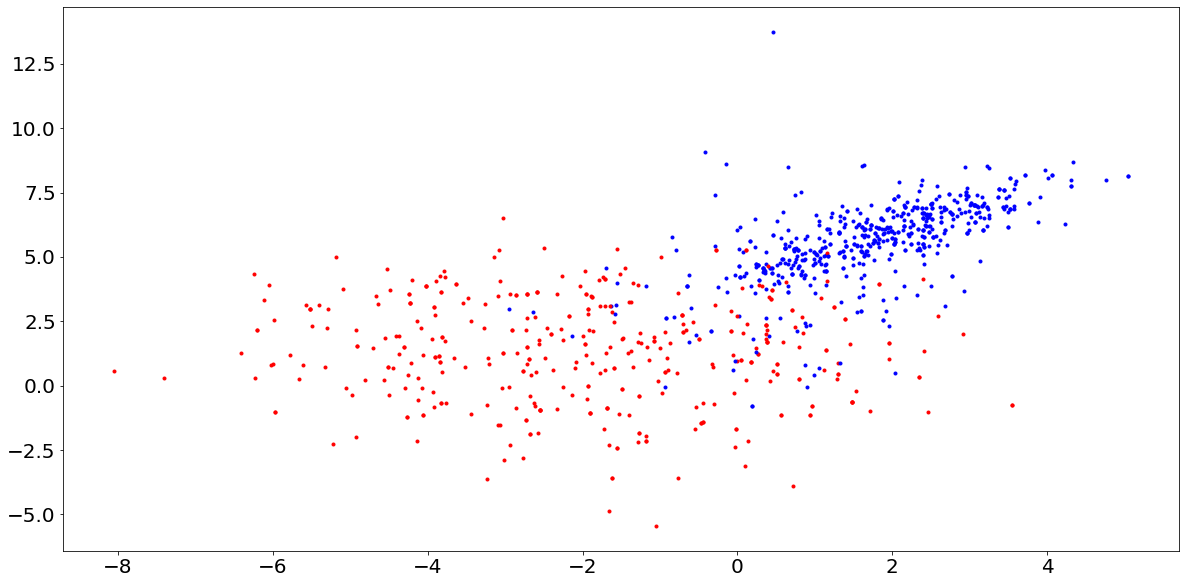

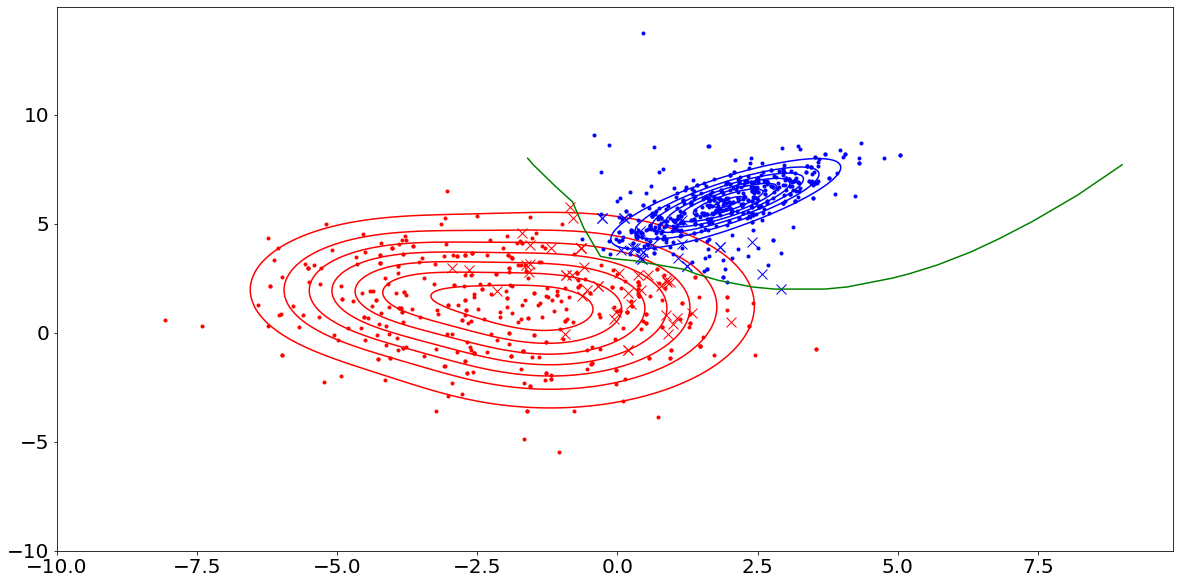

In [6]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
for i in range(N):
    if samples[2, i] == 0:
        plt.plot(samples[0, i], samples[1, i], 'r.')
    else:
        plt.plot(samples[0, i], samples[1, i], 'b.')

plt.savefig("Q2DataSamples.png")
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.axis(xlim=(-8, 6))
for i in range(N):
    if (samples[2, i] == 0) and (decisions[i] == 0): 
        plt.plot(samples[0, i], samples[1, i], 'r.')
    elif (samples[2, i] == 1) and (decisions[i] == 0): 
        plt.plot(samples[0, i], samples[1, i], 'rx', markersize=10)
    elif (samples[2, i] == 1) and (decisions[i] == 1): 
        plt.plot(samples[0, i], samples[1, i], 'b.')
    elif (samples[2, i] == 0) and (decisions[i] == 1): 
        plt.plot(samples[0, i], samples[1, i], 'bx', markersize=10)


plt.contour(x, y, g1_x, colors='r')
plt.contour(x, y, g2_x, colors='b')

plt.plot(db_x, db_y, 'g-')
plt.savefig("Q2DB.png")